## Chapter 4 -  Training Models

### Linear Regression

Linear regression is usually the first machine learning model in modern statistical learning. Although dull, it is widely used and serves as a good jumping-off point for newer approaches - many fancy statistical learning approaches can be seen as generalisations or extensions of linear regression. Hence, having a good understanding of linear regression before studying more complex learning methods cannot be overstated.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor

In [2]:
# Ingest, preprocessing
df = pd.read_csv('Advertising.csv', index_col=0)

X1 = df.iloc[:,:1]
df1 = df.iloc[:,[0,1,2,3]]

X2 = df.iloc[:,:3]
df2 = df.iloc[:, [0,3]]

y = df.iloc[:, 3]

In [3]:
# # For testing
# print('df')
# display(df.head())
# print('X1')
# display(X1.head())
# print('df1')
# display(df1.head())
# print('X2')
# display(X2.head())
# print('df2')
# display(df2.head())
# print('y')
# display(y.head())

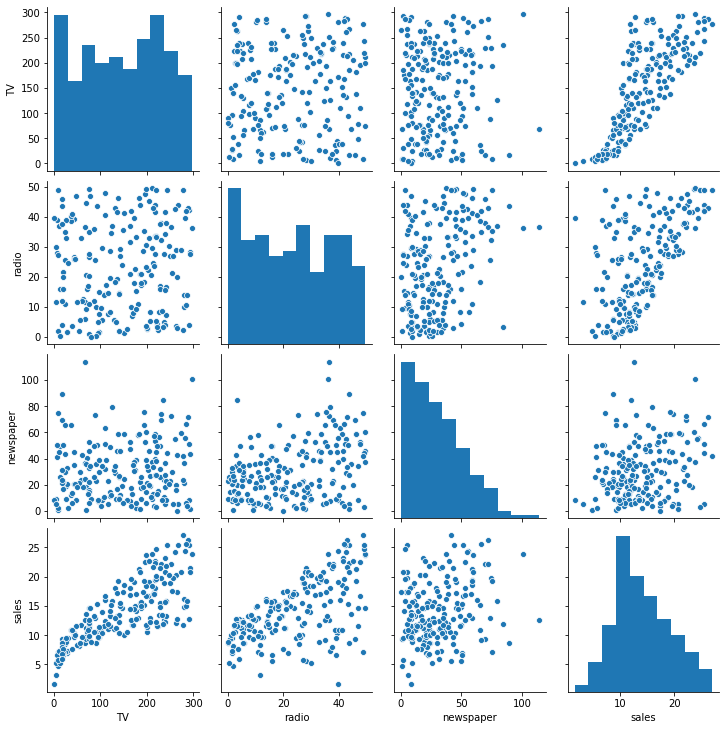

In [4]:
# Plot each of the variables against each other
sns.pairplot(df)

<b>Univariate / Simple Linear Regression</b>

Given $n$ samples, the model assumes there is approximately a linear relationship between $X$ and $Y$. Mathematically, it is in the form:
$$
y \approx \beta_0 + \beta_1x
$$
$\beta_0$ and $\beta_1$ are model coefficients or parameters that need to be estimated. The estimated values are $\hat{\beta_0}$ and $\hat{\beta_1}$ and the predicted value of $y$, $\hat{y}$ is

$$\hat{y} = \hat{\beta_0} + \hat{\beta_1}x$$ 

To obtain the parameter estimates, we find these values such that the mean squared error or MSE is minimised. Let the observations be represented in an $n$ by $p$ matrix, $\mathbf X$. The MSE is then calculated as

$$\begin{align}\text{MSE} (\mathbf X) &= \frac 1 n \sum_{i=1}^n \begin{pmatrix} \hat{y^{(i)}} - y^{(i)}\end{pmatrix}^2\\&= \frac 1 n \sum_{i=1}^n \begin{pmatrix} \hat{\beta_0} + \hat{\beta_1}x^{(i)}- y^{(i)}\end{pmatrix}^2\end{align}$$

Note that minimising the MSE is the same as minimising the residual sum of squares, RSS. This is because $\frac 1n \text{RSS} = \text{MSE}$

The closed-form solution of univariate linear regression is:

| $$\hat{\beta_1}$$| $$
\hat{\beta_1} = 
\frac{\sum^n_{i=1}\begin{bmatrix}
\begin{pmatrix}
x_i-\bar{x}
\end{pmatrix}
\begin{pmatrix}
y_i-\bar{y}
\end{pmatrix}
\end{bmatrix}}
{\sum^n_{i=1}\begin{pmatrix}x_i - \bar{x}\end{pmatrix}^2}
$$  |
|:-|:-|
|  $$\hat{\beta_0}$$    | $$
\hat{\beta_0}=\bar{y}-\hat{\beta_1}\bar{x} 
$$|

where $\bar{x} = \frac {\sum_i x}{n}$ and $\bar{y} = \frac {\sum_i y}{N}$, the respective sample means. They are also considered the least-squares coefficient estimates for univariate linear regression.

In [5]:
Xarray1 = np.c_[np.ones((X1.shape[0],1)), X1] # Add x0=1

In [6]:
# Obtaining the coefficients using the closed-form solution
df_train1 = df.copy()
df_train1['TV_mean'] = df_train1['TV'].mean()
df_train1['sales_mean'] = df_train1['sales'].mean()
df_train1['model_beta1_xmxbar'] = df_train1['TV'] - df_train1['TV_mean']
df_train1['model_beta1_ymybar'] = df_train1['sales'] - df_train1['sales_mean']
df_train1['model_beta1_numer'] = df_train1['model_beta1_xmxbar'] * df_train1['model_beta1_ymybar']
df_train1['model_beta1_denom'] = df_train1['model_beta1_xmxbar']**2
df_train1[['model_beta1_numer', 'model_beta1_denom']].head()
beta1 = df_train1['model_beta1_numer'].sum()/df_train1['model_beta1_denom'].sum()
beta0 = df_train1['sales'].mean()-beta1*df_train1['TV'].mean()
Theta_hat11 = [beta0, beta1]
print(Theta_hat11)

[7.0325935491276965, 0.047536640433019736]


In [7]:
# Predict
np.dot(Xarray1[:2], Theta_hat11)

array([17.97077451,  9.14797405])

In [8]:
# For univariate linear regression, obtain the coefficients using the normal equations
Theta_hat12 = np.dot(np.dot(np.linalg.inv(np.dot(Xarray1.T, Xarray1)), Xarray1.T),y)
Theta_hat12 = list(Theta_hat12)
print(Theta_hat12)

[7.032593549127698, 0.047536640433019736]


In [9]:
# Predict
np.dot(Xarray1[:2], Theta_hat12)

array([17.97077451,  9.14797405])

In [10]:
# Obtaining the coefficients using statsmodels
reg11 = sm.OLS(y, Xarray1)
results11 = reg11.fit()
Theta_hat13 = list(results11.params)
print(Theta_hat13)

[7.032593549127698, 0.047536640433019764]


In [11]:
# Predict
print(results11.predict(Xarray1[:2]))

[17.97077451  9.14797405]


In [12]:
# Obtaining the coefficients using sklearn
reg = LinearRegression()
reg.fit(Xarray1, y)
Theta_hat14 = reg.coef_.copy()
Theta_hat14[0] = reg.intercept_
print(Theta_hat14)

[7.03259355 0.04753664]


In [13]:
# Predict
print(reg.predict(Xarray1[:2]))

[17.97077451  9.14797405]


<b>Multiple Linear Regression</b>

The multiple linear regression model extends the univariate model. It is in the form:

$$
y \approx \beta_0 + \beta_1x_{1} + \beta_2x_{2}+ \cdots + \beta_px_{p}
$$

where $p$ is the number of features, $x_{j}$ is the value of the $j$th feature for the sample and $\beta_j$ is the corresponding model coefficient for that feature. Letting $\Theta = (\beta_1, \cdots, \beta_p)^T$ and $\mathbf x = (x_1, \cdots, x_p)^T$, we can use the more concise notation:

$$
y = \Theta^T \mathbf x
$$
Where $\Theta$ is the parameter column vector containing $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$. and $\mathbf x_i$ is the feature column vector containing $x_{ti}$ for the $i$th sample.

To obtain $\hat{\Theta}$, we use the same approach as univariate linear regression. Find values $\hat{\beta_0}, \cdots, \hat{\beta_p}$ to minimise the MSE (and consequently RSS):

$$\begin{align}\text{MSE} (\mathbf X) &= \frac 1 n \sum_{i=1}^n \begin{bmatrix} \hat{y^{(i)}} - y^{(i)})\end{bmatrix}^2\\&= \frac 1 n \sum_{i=1}^n \begin{bmatrix} \hat{\beta_0} + \hat{\beta_1}x^{(i)}_1 + \hat{\beta_2}x^{(i)}_2 + \cdots + \hat{\beta_p}x^{(i)}_p - y^{(i)})\end{bmatrix}^2\end{align}$$

The closed-form solution for multiple linear regression is the normal equation. Let $\mathbf y = (y^{(1)}, \cdots, y^{(n)})^T$:

$$\hat{\Theta} = (\mathbf X ^T \mathbf X)^{-1} \mathbf X^T \mathbf y$$

In [14]:
Xarray2 = np.c_[np.ones((X1.shape[0],1)), X2] # Add x0 = 1

In [15]:
# For multiple linear regression, obtain the coefficients using the normal equations
Theta_hat21 = np.dot(np.dot(np.linalg.inv(np.dot(Xarray2.T, Xarray2)), Xarray2.T),y)
float_formatter = "{:.6f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})
print(Theta_hat21)

[2.938889 0.045765 0.188530 -0.001037]


In [16]:
# Predict
print(np.dot(Xarray2[:2], Theta_hat21))

[20.523974 12.337855]


In [17]:
# Obtaining the coefficients using statsmodels
reg21 = sm.OLS(y, Xarray2)
results21 = reg21.fit()
Theta_hat22 = list(results21.params)
print(["{:.6f}".format(t) for t in Theta_hat22])

['2.938889', '0.045765', '0.188530', '-0.001037']


In [18]:
# Predict
results21.predict(Xarray2[:2])

array([20.523974, 12.337855])

In [19]:
# Obtaining the coefficients using sklearn
reg2 = LinearRegression()
reg2.fit(Xarray2, y)
Theta_hat23 = reg2.coef_.copy()
Theta_hat23[0] = reg2.intercept_
print(Theta_hat23)

[2.938889 0.045765 0.188530 -0.001037]


In [20]:
# Predict
print(reg2.predict(Xarray2[:2]))

[20.523974 12.337855]


### Gradient Descent - Batch Gradient Descent

Gradient descent is a generic optimization problem capable of finding optimal solutions to many problems. The idea is to tweak parameters iteratively to minimize a cost function. 

- Note that when using gradient descent, the features must have a similar scale or it will take longer to converge.

Hence, to use gradient descent on a linear regression problem, we revisit the cost function, the MSE: $\text{MSE} (\Theta) = \frac 1 n \sum_{i=1}^n \begin{bmatrix} \Theta^T \mathbf x^{(i)} - y^{(i)})\end{bmatrix}^2$ and now compute the gradient w.r.t. the parameters $\beta_j$. Each expression is the partial derivative for every parameter $\beta_j$.
$$\frac{\partial}{\partial \beta_j}\text{MSE}(\Theta) = \frac 2n \sum_{i=1}^n \begin{bmatrix} \Theta^T \mathbf x^{(i)} - y^{(i)})\end{bmatrix} x_j^{(i)}$$

Combining them all, we obtain the gradient vector of the cost function:

$$\nabla_\beta \text{MSE}(\Theta) = \begin{bmatrix}\frac{\partial}{\partial \beta_0}\text{MSE}(\Theta)\\\frac{\partial}{\partial \beta_1}\text{MSE}(\Theta)\\\ \vdots\\\frac{\partial}{\partial \beta_p}\text{MSE}(\Theta)\end{bmatrix}= \begin{bmatrix}\frac 2n \sum_{i=1}^n \begin{bmatrix} \Theta^T \mathbf x^{(i)} - y^{(i)})\end{bmatrix} x_0^{(i)}\\\frac 2n \sum_{i=1}^n \begin{bmatrix} \Theta^T \mathbf x^{(i)} - y^{(i)})\end{bmatrix} x_1^{(i)}\\\ \vdots\\\frac 2n \sum_{i=1}^n \begin{bmatrix} \Theta^T \mathbf x^{(i)} - y^{(i)})\end{bmatrix} x_n^{(i)}\end{bmatrix} = \frac 2n \mathbf X^T (X\Theta - y)$$

In each step of gradient descent, we calculate $\nabla_\beta \text{MSE}(\Theta)$, the direction of movement for the gradients after going through the batch once. Then, we multiply this by the learning rate $\eta$, and update the parameter vector:
$$\Theta^{\text{new}} = \Theta - \eta \cdot \nabla_\theta \text{MSE}(\Theta)$$

In [36]:
# GD for the multivariate case
eta = 0.00001 # learning rate
n_iterations = 50000 # number of iterations for GD

# Initialise the parameter vector
n, p = Xarray2.shape[0], Xarray2.shape[1]
Theta_hat2gd = np.random.normal(0,1,p)
print(Theta_hat2gd)

[0.787003 0.068653 1.612421 -1.582863]


In [37]:
for itn in range(n_iterations):
    gradients = 2/n * np.dot(Xarray2.T,np.dot(Xarray2, Theta_hat2gd) - np.array(y))
    Theta_hat2gd = Theta_hat2gd - eta * gradients

In [38]:
print(Theta_hat2gd)

[1.073751 0.050858 0.209926 0.010291]


And it can be verified that the values obtained via gradient descent is the same as that of the normal equations.

### Gradient Descent - Stochastic Gradient Descent

Batch gradient descent uses the whole training set when running every epoch. In contrast, Stochastic gradient descent picks a random sample from the training set at every epoch and computes the gradients based only on that single instance.

By convention, we iterate by rounds of $m$ iterations, and each round is called an epoch. 

In [24]:
# SGD for the univariate case, using SKLearn
# Train
scaler = StandardScaler()

reg_sgd1 = SGDRegressor(max_iter=1000000, penalty=None, eta0=0.0025)
Xarray1_s = scaler.fit_transform(Xarray1)
reg_sgd1.fit(Xarray1_s, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0025, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [25]:
# SGD for the multivariate case, using SKLearn
# Train
scaler2 = StandardScaler()
reg_sgd = SGDRegressor(max_iter=5000000, penalty=None, eta0=0.0025)
Xarray2_s = scaler2.fit_transform(Xarray2)
reg_sgd.fit(Xarray2_s, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0025, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=5000000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [26]:
# Univariate Case
print(np.dot(Xarray1[:3], Theta_hat11)) # Closed-form solution
print(np.dot(Xarray1[:3], Theta_hat12)) # Closed-form solution, normal equations
print(results11.predict(Xarray1[:3])) # statsmodels
print(reg.predict(Xarray1[:3])) # sklearn LinearRegression
print(reg_sgd1.predict(Xarray1_s[:3])) # Stochastic Gradient Descent (SGDRegressor from sklearn)

[17.970775 9.147974 7.850224]
[17.970775 9.147974 7.850224]
[17.970775 9.147974 7.850224]
[17.970775 9.147974 7.850224]
[17.826052 9.074389 7.787103]


In [39]:
# Multivariate Case
print(np.dot(Xarray2[10:14],Theta_hat21)) # Normal equations
print(np.dot(Xarray2[10:14],Theta_hat22)) # statsmodels
print(reg2.predict(Xarray2[10:14])) # sklearn LinearRegression
print(np.dot(Xarray2[10:14],Theta_hat2gd)) # Batch Gradient Descent
print(reg_sgd.predict(Xarray2_s[10:14])) # Stochastic Gradient Descent (SGDRegressor from sklearn)

[7.032299 17.285129 10.577121 8.826300]
[7.032299 17.285129 10.577121 8.826300]
[7.032299 17.285129 10.577121 8.826300]
[5.902096 17.072383 10.330784 7.701954]
[7.004401 17.085039 10.565385 8.734636]
